## Data Overview

**Dataset:** Flights status dataset (From Bureau of Transportation Statistics)  

**Link:** https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGK  

**Type:** CSV file  

**Description:**  This dataset contains flight information, including cancellations and delays by airlines, dating back to January 2018 to the present. It includes columns such as date, airline, origin city, destination city, departure time, arrival time, and more, across different cities.

* ### Year 2018

In [18]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


In [19]:
#read csv file
df1=pd.read_csv('/Users/saaijeeshsn/Data Mining project/Combined_Flights_2018.csv')
df1.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


In [20]:
#find its shape
df1.shape

(5689512, 61)

In [21]:
#display the column names
df1.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

## Data Preprocessing

### 1. Rename columns to lower case for better readability

In [22]:
#rename columns
df1.columns = df1.columns.str.lower()
df1.columns

Index(['flightdate', 'airline', 'origin', 'dest', 'cancelled', 'diverted',
       'crsdeptime', 'deptime', 'depdelayminutes', 'depdelay', 'arrtime',
       'arrdelayminutes', 'airtime', 'crselapsedtime', 'actualelapsedtime',
       'distance', 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek',
       'marketing_airline_network', 'operated_or_branded_code_share_partners',
       'dot_id_marketing_airline', 'iata_code_marketing_airline',
       'flight_number_marketing_airline', 'operating_airline',
       'dot_id_operating_airline', 'iata_code_operating_airline',
       'tail_number', 'flight_number_operating_airline', 'originairportid',
       'originairportseqid', 'origincitymarketid', 'origincityname',
       'originstate', 'originstatefips', 'originstatename', 'originwac',
       'destairportid', 'destairportseqid', 'destcitymarketid', 'destcityname',
       'deststate', 'deststatefips', 'deststatename', 'destwac', 'depdel15',
       'departuredelaygroups', 'deptimeblk', 'taxiou

### 2. Filter the data for flights that weren't cancelled and not diverted.

In [23]:
df1_cancellation_f = df1[(df1['cancelled'] == False) & (df1['diverted'] == False)]
df1_cancellation_f.head(5)

,flightdate,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,wheelsoff,wheelson,taxiin,crsarrtime,arrdelay,arrdel15,arrivaldelaygroups,arrtimeblk,distancegroup,divairportlandings
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1211.0,1249.0,7.0,1304,-8.0,0.0,-1.0,1300-1359,1,0.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,1210.0,1246.0,12.0,1304,-6.0,0.0,-1.0,1300-1359,1,0.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,1211.0,1251.0,11.0,1304,-2.0,0.0,-1.0,1300-1359,1,0.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,1207.0,1242.0,11.0,1304,-11.0,0.0,-1.0,1300-1359,1,0.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,1412.0,1448.0,11.0,1500,-1.0,0.0,-1.0,1500-1559,1,0.0


### 3. Check for missing values

In [24]:
#check for missing values
df1_cancellation_f.isnull().sum()

flightdate              0
airline                 0
origin                  0
dest                    0
cancelled               0
                     ... 
arrdel15              567
arrivaldelaygroups    567
arrtimeblk              0
distancegroup           0
divairportlandings      0
Length: 61, dtype: int64

In [25]:
#check for null entries
filter_null_counts = df1_cancellation_f.isnull().sum()

#filter the columns with null entries
filter_columns_with_null = filter_null_counts[filter_null_counts > 0]

#display the column names
filter_columns_with_null

deptime                   20
depdelayminutes         1105
depdelay                1105
arrtime                   21
arrdelayminutes          567
airtime                 6945
actualelapsedtime         21
tail_number               19
depdel15                1105
departuredelaygroups    1105
taxiout                 6939
wheelsoff               6939
wheelson                6935
taxiin                  6936
arrdelay                 567
arrdel15                 567
arrivaldelaygroups       567
dtype: int64

### Handling deptime column missing values

In [26]:
# Fill missing values in 'DepTime' with values from 'CRSDepTime'
df1_cancellation_f.loc[df1_cancellation_f['deptime'].isnull(), 'deptime'] = df1_cancellation_f['crsdeptime']

### Handling depdelayminutes column missing values

In [27]:
# condition: in missing spaces in depdelayminutes, set values based on comparison between crsdeptime and deptime
df1_cancellation_f.loc[df1_cancellation_f['depdelayminutes'].isnull(), 'depdelayminutes'] = \
    df1_cancellation_f.apply(lambda row: 0 if row['crsdeptime'] == row['deptime']
                                    else max(0, row['deptime'] - row['crsdeptime']) if row['deptime'] > row['crsdeptime']
                                    else row['deptime'] - row['crsdeptime'], axis=1)

### Handling depdelay column missing values

In [28]:
# Condition: if depdelay is missing then depdelay = deptime - crsdeptime
df1_cancellation_f.loc[df1_cancellation_f['depdelay'].isnull(), 'depdelay'] = \
    df1_cancellation_f['deptime'] - df1_cancellation_f['crsdeptime']


### Handling airtime column missing values

In [29]:
import numpy as np

# Condition: if air time is missing then airtime = crselapsedtime - randomly reduce (15-30)
missing_airtime = df1_cancellation_f['airtime'].isnull()
random_reduction = np.random.randint(15, 31, size=missing_airtime.sum())
df1_cancellation_f.loc[missing_airtime, 'airtime'] = df1_cancellation_f.loc[missing_airtime, 'crselapsedtime'] - random_reduction


### Handling arrtime column missing values

In [30]:
# Fill missing values in 'ArrTime' with values from 'CRSArrTime'
df1_cancellation_f.loc[df1_cancellation_f['arrtime'].isnull(), 'arrtime'] = df1_cancellation_f['crsarrtime']

### Handling arrdelayminutes column missing values

In [31]:
# condition: in missing spaces in arrdelayminutes, set values based on comparison between crsarrtime and arrtime
df1_cancellation_f.loc[df1_cancellation_f['arrdelayminutes'].isnull(), 'arrdelayminutes'] = \
    df1_cancellation_f.apply(lambda row: 0 if row['crsarrtime'] == row['arrtime']
                                    else max(0, row['arrtime'] - row['crsarrtime']) if row['arrtime'] > row['crsarrtime']
                                    else row['arrtime'] - row['crsarrtime'], axis=1)

### Handling arrdelay column missing values

In [32]:
df1_cancellation_f.loc[df1_cancellation_f['arrdelay'].isnull(), 'arrdelay'] = \
    df1_cancellation_f['arrtime'] - df1_cancellation_f['crsarrtime']


### Handling actualelapsedtime column missing values

In [33]:
df1_cancellation_f['actualelapsedtime'].fillna(df1_cancellation_f['crselapsedtime'], inplace=True)

### Removing unnecessary columns

In [34]:
df1_cancellation_f=df1_cancellation_f.drop(columns=['tail_number','taxiout','wheelsoff','wheelson','taxiin','depdel15','departuredelaygroups','arrdel15','arrivaldelaygroups','divairportlandings'])
df1_cancellation_f.head()

,flightdate,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,destcityname,deststate,deststatefips,deststatename,destwac,deptimeblk,crsarrtime,arrdelay,arrtimeblk,distancegroup
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,"Atlanta, GA",GA,13,Georgia,34,1200-1259,1304,-8.0,1300-1359,1
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,"Atlanta, GA",GA,13,Georgia,34,1200-1259,1304,-6.0,1300-1359,1
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,"Atlanta, GA",GA,13,Georgia,34,1200-1259,1304,-2.0,1300-1359,1
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,"Atlanta, GA",GA,13,Georgia,34,1200-1259,1304,-11.0,1300-1359,1
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,"Atlanta, GA",GA,13,Georgia,34,1400-1459,1500,-1.0,1500-1559,1


In [35]:
#check for null entries
filter_null_counts = df1_cancellation_f.isnull().sum()

#filter the columns with null entries
filter_columns_with_null = filter_null_counts[filter_null_counts > 0]

#display the column names
filter_columns_with_null



Series([], dtype: int64)

### 4. Check for datatypes

In [36]:
#check the datatypes
df1_cancellation_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5587186 entries, 0 to 5689511
Data columns (total 51 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   flightdate                               object 
 1   airline                                  object 
 2   origin                                   object 
 3   dest                                     object 
 4   cancelled                                bool   
 5   diverted                                 bool   
 6   crsdeptime                               int64  
 7   deptime                                  float64
 8   depdelayminutes                          float64
 9   depdelay                                 float64
 10  arrtime                                  float64
 11  arrdelayminutes                          float64
 12  airtime                                  float64
 13  crselapsedtime                           float64
 14  actualelapsedtime      

In [37]:
#convert the datatype 
df1_cancellation_f['flightdate']=pd.to_datetime(df1_cancellation_f['flightdate'])
df1_cancellation_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5587186 entries, 0 to 5689511
Data columns (total 51 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   flightdate                               datetime64[ns]
 1   airline                                  object        
 2   origin                                   object        
 3   dest                                     object        
 4   cancelled                                bool          
 5   diverted                                 bool          
 6   crsdeptime                               int64         
 7   deptime                                  float64       
 8   depdelayminutes                          float64       
 9   depdelay                                 float64       
 10  arrtime                                  float64       
 11  arrdelayminutes                          float64       
 12  airtime                          

### 5. Check for Duplicates

In [38]:
#check for duplicate entries
duplicate_rows = df1_cancellation_f.duplicated().sum()
duplicate_rows

0

## Data Overview

* ### Year 2019

In [39]:
#read csv file
df2=pd.read_csv('/Users/saaijeeshsn/Data Mining project/Combined_Flights_2019.csv')
df2.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1212,1209.0,0.0,-3.0,...,1219.0,1342.0,8.0,1405,-15.0,0.0,-1.0,1400-1459,3,0
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,1200.0,0.0,-12.0,...,1210.0,1339.0,9.0,1405,-17.0,0.0,-2.0,1400-1459,3,0
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1212,1203.0,0.0,-9.0,...,1214.0,1336.0,6.0,1405,-23.0,0.0,-2.0,1400-1459,3,0
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1212,1435.0,143.0,143.0,...,1452.0,1615.0,6.0,1405,136.0,1.0,9.0,1400-1459,3,0
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1212,1216.0,4.0,4.0,...,1234.0,1357.0,13.0,1405,5.0,0.0,0.0,1400-1459,3,0


In [40]:
#find its shape
df2.shape

(8091684, 61)

In [41]:
#display the column names
df2.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

## Data Preprocessing

### 1. Rename columns to lower case for better readability

In [42]:
#rename columns
df2.columns = df2.columns.str.lower()
df2.columns

Index(['flightdate', 'airline', 'origin', 'dest', 'cancelled', 'diverted',
       'crsdeptime', 'deptime', 'depdelayminutes', 'depdelay', 'arrtime',
       'arrdelayminutes', 'airtime', 'crselapsedtime', 'actualelapsedtime',
       'distance', 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek',
       'marketing_airline_network', 'operated_or_branded_code_share_partners',
       'dot_id_marketing_airline', 'iata_code_marketing_airline',
       'flight_number_marketing_airline', 'operating_airline',
       'dot_id_operating_airline', 'iata_code_operating_airline',
       'tail_number', 'flight_number_operating_airline', 'originairportid',
       'originairportseqid', 'origincitymarketid', 'origincityname',
       'originstate', 'originstatefips', 'originstatename', 'originwac',
       'destairportid', 'destairportseqid', 'destcitymarketid', 'destcityname',
       'deststate', 'deststatefips', 'deststatename', 'destwac', 'depdel15',
       'departuredelaygroups', 'deptimeblk', 'taxiou

### 2. Filter the data for flights that weren't cancelled and not diverted.

In [43]:
df2_cancellation_f = df2[(df2['cancelled'] == False) & (df2['diverted'] == False)]
df2_cancellation_f.head(5)

,flightdate,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,wheelsoff,wheelson,taxiin,crsarrtime,arrdelay,arrdel15,arrivaldelaygroups,arrtimeblk,distancegroup,divairportlandings
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1212,1209.0,0.0,-3.0,...,1219.0,1342.0,8.0,1405,-15.0,0.0,-1.0,1400-1459,3,0
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,1200.0,0.0,-12.0,...,1210.0,1339.0,9.0,1405,-17.0,0.0,-2.0,1400-1459,3,0
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1212,1203.0,0.0,-9.0,...,1214.0,1336.0,6.0,1405,-23.0,0.0,-2.0,1400-1459,3,0
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1212,1435.0,143.0,143.0,...,1452.0,1615.0,6.0,1405,136.0,1.0,9.0,1400-1459,3,0
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1212,1216.0,4.0,4.0,...,1234.0,1357.0,13.0,1405,5.0,0.0,0.0,1400-1459,3,0


### 3. Check for missing values

In [44]:
#check for missing values
df2_cancellation_f.isnull().sum()

flightdate            0
airline               0
origin                0
dest                  0
cancelled             0
                     ..
arrdel15              0
arrivaldelaygroups    0
arrtimeblk            0
distancegroup         0
divairportlandings    0
Length: 61, dtype: int64

In [45]:
#check for null entries
filter_null_counts_2 = df2_cancellation_f.isnull().sum()

#filter the columns with null entries
filter_columns_with_null_2 = filter_null_counts_2[filter_null_counts_2 > 0]

#display the column names
filter_columns_with_null_2

crselapsedtime    1
dtype: int64

### Handling crselapsedtime column missing values

In [46]:
df2_cancellation_f['crselapsedtime'].fillna(df2_cancellation_f['actualelapsedtime'], inplace=True)

In [47]:
#check for null entries
filter_null_counts_2 = df2_cancellation_f.isnull().sum()

#filter the columns with null entries
filter_columns_with_null_2 = filter_null_counts_2[filter_null_counts_2 > 0]

#display the column names
filter_columns_with_null_2

Series([], dtype: int64)

### 4. Removing unnecessary columns

In [48]:
df2_cancellation_f=df2_cancellation_f.drop(columns=['tail_number','taxiout','wheelsoff','wheelson','taxiin','depdel15','departuredelaygroups','arrdel15','arrivaldelaygroups','divairportlandings'])
df2_cancellation_f.head()

,flightdate,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,destcityname,deststate,deststatefips,deststatename,destwac,deptimeblk,crsarrtime,arrdelay,arrtimeblk,distancegroup
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1212,1209.0,0.0,-3.0,...,"Chicago, IL",IL,17,Illinois,41,1200-1259,1405,-15.0,1400-1459,3
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,1200.0,0.0,-12.0,...,"Chicago, IL",IL,17,Illinois,41,1200-1259,1405,-17.0,1400-1459,3
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1212,1203.0,0.0,-9.0,...,"Chicago, IL",IL,17,Illinois,41,1200-1259,1405,-23.0,1400-1459,3
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1212,1435.0,143.0,143.0,...,"Chicago, IL",IL,17,Illinois,41,1200-1259,1405,136.0,1400-1459,3
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1212,1216.0,4.0,4.0,...,"Chicago, IL",IL,17,Illinois,41,1200-1259,1405,5.0,1400-1459,3


### 5. Check for datatypes

In [49]:
df2_cancellation_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7917264 entries, 0 to 8091683
Data columns (total 51 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   flightdate                               object 
 1   airline                                  object 
 2   origin                                   object 
 3   dest                                     object 
 4   cancelled                                bool   
 5   diverted                                 bool   
 6   crsdeptime                               int64  
 7   deptime                                  float64
 8   depdelayminutes                          float64
 9   depdelay                                 float64
 10  arrtime                                  float64
 11  arrdelayminutes                          float64
 12  airtime                                  float64
 13  crselapsedtime                           float64
 14  actualelapsedtime      

In [50]:
#convert the datatype 
df2_cancellation_f['flightdate']=pd.to_datetime(df2_cancellation_f['flightdate'])
df2_cancellation_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7917264 entries, 0 to 8091683
Data columns (total 51 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   flightdate                               datetime64[ns]
 1   airline                                  object        
 2   origin                                   object        
 3   dest                                     object        
 4   cancelled                                bool          
 5   diverted                                 bool          
 6   crsdeptime                               int64         
 7   deptime                                  float64       
 8   depdelayminutes                          float64       
 9   depdelay                                 float64       
 10  arrtime                                  float64       
 11  arrdelayminutes                          float64       
 12  airtime                          

### 6. Check for Duplicates

In [51]:
#check for duplicate entries
duplicate_rows_2 = df2_cancellation_f.duplicated().sum()
duplicate_rows_2

0

## Data Overview

* ### Year 2020

In [52]:
#read csv file
df3=pd.read_csv('/Users/saaijeeshsn/Data Mining project/Combined_Flights_2020.csv')
df3.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2030.0,4.0,2056,-22.0,0.0,-2.0,2000-2059,2,0.0
1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2022.0,5.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,0.0,-10.0,...,2000.0,2117.0,5.0,2056,26.0,1.0,1.0,2000-2059,2,0.0
3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,0.0,-8.0,...,1910.0,2023.0,4.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,0.0,-9.0,...,1910.0,2022.0,4.0,2056,-30.0,0.0,-2.0,2000-2059,2,0.0


In [53]:
#find its shape
df3.shape

(5022397, 61)

In [54]:
#display the column names
df3.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

## Data Preprocessing

### 1. Rename columns to lower case for better readability

In [55]:
#rename columns
df3.columns = df3.columns.str.lower()
df3.columns

Index(['flightdate', 'airline', 'origin', 'dest', 'cancelled', 'diverted',
       'crsdeptime', 'deptime', 'depdelayminutes', 'depdelay', 'arrtime',
       'arrdelayminutes', 'airtime', 'crselapsedtime', 'actualelapsedtime',
       'distance', 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek',
       'marketing_airline_network', 'operated_or_branded_code_share_partners',
       'dot_id_marketing_airline', 'iata_code_marketing_airline',
       'flight_number_marketing_airline', 'operating_airline',
       'dot_id_operating_airline', 'iata_code_operating_airline',
       'tail_number', 'flight_number_operating_airline', 'originairportid',
       'originairportseqid', 'origincitymarketid', 'origincityname',
       'originstate', 'originstatefips', 'originstatename', 'originwac',
       'destairportid', 'destairportseqid', 'destcitymarketid', 'destcityname',
       'deststate', 'deststatefips', 'deststatename', 'destwac', 'depdel15',
       'departuredelaygroups', 'deptimeblk', 'taxiou

### 2. Filter the data for flights that weren't cancelled and not diverted.

In [56]:
df3_cancellation_f = df3[(df3['cancelled'] == False) & (df3['diverted'] == False)]
df3_cancellation_f.head(5)

,flightdate,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,wheelsoff,wheelson,taxiin,crsarrtime,arrdelay,arrdel15,arrivaldelaygroups,arrtimeblk,distancegroup,divairportlandings
0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2030.0,4.0,2056,-22.0,0.0,-2.0,2000-2059,2,0.0
1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,1914.0,2022.0,5.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,0.0,-10.0,...,2000.0,2117.0,5.0,2056,26.0,1.0,1.0,2000-2059,2,0.0
3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,0.0,-8.0,...,1910.0,2023.0,4.0,2056,-29.0,0.0,-2.0,2000-2059,2,0.0
4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,0.0,-9.0,...,1910.0,2022.0,4.0,2056,-30.0,0.0,-2.0,2000-2059,2,0.0


### 3. Check for missing values

In [57]:
#check for missing values
df3_cancellation_f.isnull().sum()

flightdate             0
airline                0
origin                 0
dest                   0
cancelled              0
                      ..
arrdel15               1
arrivaldelaygroups     1
arrtimeblk             0
distancegroup          0
divairportlandings    87
Length: 61, dtype: int64

In [58]:
#check for null entries
filter_null_counts_3 = df3_cancellation_f.isnull().sum()

#filter the columns with null entries
filter_columns_with_null_3 = filter_null_counts_3[filter_null_counts_3 > 0]

#display the column names
filter_columns_with_null_3

arrtime                1
arrdelayminutes        1
airtime                1
actualelapsedtime      1
wheelson               1
taxiin                 1
arrdelay               1
arrdel15               1
arrivaldelaygroups     1
divairportlandings    87
dtype: int64

### Removing unnecessary columns

In [59]:
df3_cancellation_f=df3_cancellation_f.drop(columns=['tail_number','taxiout','wheelsoff','wheelson','taxiin','depdel15','departuredelaygroups','arrdel15','arrivaldelaygroups','divairportlandings'])
df3_cancellation_f.head()

,flightdate,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,destcityname,deststate,deststatefips,deststatename,destwac,deptimeblk,crsarrtime,arrdelay,arrtimeblk,distancegroup
0,2020-09-01,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,"Dayton, OH",OH,39,Ohio,44,1900-1959,2056,-22.0,2000-2059,2
1,2020-09-02,Comair Inc.,PHL,DAY,False,False,1905,1858.0,0.0,-7.0,...,"Dayton, OH",OH,39,Ohio,44,1900-1959,2056,-29.0,2000-2059,2
2,2020-09-03,Comair Inc.,PHL,DAY,False,False,1905,1855.0,0.0,-10.0,...,"Dayton, OH",OH,39,Ohio,44,1900-1959,2056,26.0,2000-2059,2
3,2020-09-04,Comair Inc.,PHL,DAY,False,False,1905,1857.0,0.0,-8.0,...,"Dayton, OH",OH,39,Ohio,44,1900-1959,2056,-29.0,2000-2059,2
4,2020-09-05,Comair Inc.,PHL,DAY,False,False,1905,1856.0,0.0,-9.0,...,"Dayton, OH",OH,39,Ohio,44,1900-1959,2056,-30.0,2000-2059,2


In [60]:
#check for null entries
filter_null_counts_3 = df3_cancellation_f.isnull().sum()

#filter the columns with null entries
filter_columns_with_null_3 = filter_null_counts_3[filter_null_counts_3 > 0]

#display the column names
filter_columns_with_null_3

arrtime              1
arrdelayminutes      1
airtime              1
actualelapsedtime    1
arrdelay             1
dtype: int64

In [61]:
# Drop rows with missing values in the specified columns
df3_cancellation_f.dropna(subset=['arrtime','arrdelayminutes','airtime','actualelapsedtime','arrdelay'], inplace=True)

### 4. Check for datatypes

In [62]:
df3_cancellation_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4712930 entries, 0 to 5022396
Data columns (total 51 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   flightdate                               object 
 1   airline                                  object 
 2   origin                                   object 
 3   dest                                     object 
 4   cancelled                                bool   
 5   diverted                                 bool   
 6   crsdeptime                               int64  
 7   deptime                                  float64
 8   depdelayminutes                          float64
 9   depdelay                                 float64
 10  arrtime                                  float64
 11  arrdelayminutes                          float64
 12  airtime                                  float64
 13  crselapsedtime                           float64
 14  actualelapsedtime      

In [63]:
#convert the datatype 
df3_cancellation_f['flightdate']=pd.to_datetime(df3_cancellation_f['flightdate'])
df3_cancellation_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4712930 entries, 0 to 5022396
Data columns (total 51 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   flightdate                               datetime64[ns]
 1   airline                                  object        
 2   origin                                   object        
 3   dest                                     object        
 4   cancelled                                bool          
 5   diverted                                 bool          
 6   crsdeptime                               int64         
 7   deptime                                  float64       
 8   depdelayminutes                          float64       
 9   depdelay                                 float64       
 10  arrtime                                  float64       
 11  arrdelayminutes                          float64       
 12  airtime                          

### 5. Check for Duplicates

In [64]:
#check for duplicate entries
duplicate_rows_3 = df3_cancellation_f.duplicated().sum()
duplicate_rows_3

0

## Merged Dataset of three years

In [65]:
#concatenate df1,df2,df3,df4 and df5 together into a single dataframe
merged_df_3 = pd.concat([df1_cancellation_f, df2_cancellation_f,df3_cancellation_f], ignore_index=True)
merged_df_3.head()

,flightdate,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,destcityname,deststate,deststatefips,deststatename,destwac,deptimeblk,crsarrtime,arrdelay,arrtimeblk,distancegroup
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,"Atlanta, GA",GA,13,Georgia,34,1200-1259,1304,-8.0,1300-1359,1
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,"Atlanta, GA",GA,13,Georgia,34,1200-1259,1304,-6.0,1300-1359,1
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,"Atlanta, GA",GA,13,Georgia,34,1200-1259,1304,-2.0,1300-1359,1
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,"Atlanta, GA",GA,13,Georgia,34,1200-1259,1304,-11.0,1300-1359,1
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,"Atlanta, GA",GA,13,Georgia,34,1400-1459,1500,-1.0,1500-1559,1


In [66]:
#find its shape
merged_df_3.shape

(18217380, 51)

In [67]:
merged_df_3.columns

Index(['flightdate', 'airline', 'origin', 'dest', 'cancelled', 'diverted',
       'crsdeptime', 'deptime', 'depdelayminutes', 'depdelay', 'arrtime',
       'arrdelayminutes', 'airtime', 'crselapsedtime', 'actualelapsedtime',
       'distance', 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek',
       'marketing_airline_network', 'operated_or_branded_code_share_partners',
       'dot_id_marketing_airline', 'iata_code_marketing_airline',
       'flight_number_marketing_airline', 'operating_airline',
       'dot_id_operating_airline', 'iata_code_operating_airline',
       'flight_number_operating_airline', 'originairportid',
       'originairportseqid', 'origincitymarketid', 'origincityname',
       'originstate', 'originstatefips', 'originstatename', 'originwac',
       'destairportid', 'destairportseqid', 'destcitymarketid', 'destcityname',
       'deststate', 'deststatefips', 'deststatename', 'destwac', 'deptimeblk',
       'crsarrtime', 'arrdelay', 'arrtimeblk', 'distancegroup'],


In [68]:
merged_df_3.isnull().sum()

flightdate                                 0
airline                                    0
origin                                     0
dest                                       0
cancelled                                  0
diverted                                   0
crsdeptime                                 0
deptime                                    0
depdelayminutes                            0
depdelay                                   0
arrtime                                    0
arrdelayminutes                            0
airtime                                    0
crselapsedtime                             0
actualelapsedtime                          0
distance                                   0
year                                       0
quarter                                    0
month                                      0
dayofmonth                                 0
dayofweek                                  0
marketing_airline_network                  0
operated_o

In [69]:
#check for null entries
filter_null_counts_4 = merged_df_3.isnull().sum()

#filter the columns with null entries
filter_columns_with_null_4 = filter_null_counts_4[filter_null_counts_4 > 0]

#display the column names
filter_columns_with_null_4

Series([], dtype: int64)

In [70]:
merged_df_3.to_csv('/Users/saaijeeshsn/Data Mining project/Merged_data.csv')

## Data from an API

In [71]:
#load data from an api (calling the stored csv file)
api_weather_data=pd.read_csv('/Users/saaijeeshsn/Data Mining project/weather_data.csv')
api_weather_data.head()

,origin,date,temp,dew,min_temp,max_temp,sp_humid,rel_humid,precip,wspeed_10m,wdirection_10m,wspeed_50m,wdirection_50m
0,DEN,2018-01-01,9.28,-11.18,-11.24,-1.95,1.77,81.00,0.00,3.27,100.38,3.48,100.81
1,DEN,2018-01-02,16.18,-13.67,-12.00,4.18,1.40,66.06,0.01,5.35,146.31,6.78,130.69
2,DEN,2018-01-03,15.35,-15.13,-5.77,9.58,1.28,31.69,0.00,3.43,212.12,5.35,212.75
3,DEN,2018-01-04,10.71,-10.07,-2.56,8.15,2.01,43.75,0.01,3.79,258.75,5.77,258.25
4,DEN,2018-01-05,12.71,-8.99,-1.90,10.81,2.20,43.38,0.00,3.02,210.88,6.42,211.44


## Merge API and CSV file

### Lets focus on the major cities and drop the remaining rows 

In [72]:
# Define the list of airport codes
airport_codes = ['DEN', 'ORD', 'ATL', 'DFW', 'JFK', 'LAX', 'CLT', 'DCA', 'IAD', 'SEA', 'SFO', 'LAS', 'MSP', 'BOS', 'PDX', 'OGG', 'HNL']

# Filter rows based on the 'origin' or 'dest' columns
merged_df_3 = merged_df_3[merged_df_3['origin'].isin(airport_codes) & merged_df_3['dest'].isin(airport_codes)].reset_index(drop=True)

# Display the first few rows of the DataFrame
merged_df_3.head()

,flightdate,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,destcityname,deststate,deststatefips,deststatename,destwac,deptimeblk,crsarrtime,arrdelay,arrtimeblk,distancegroup
0,2018-01-13,Endeavor Air Inc.,MSP,CLT,False,False,1925,1923.0,0.0,-2.0,...,"Charlotte, NC",NC,37,North Carolina,36,1900-1959,2257,0.0,2200-2259,4
1,2018-01-01,Endeavor Air Inc.,DCA,JFK,False,False,900,949.0,49.0,49.0,...,"New York, NY",NY,36,New York,22,0900-0959,1023,36.0,1000-1059,1
2,2018-01-01,Endeavor Air Inc.,ORD,ATL,False,False,1515,1509.0,0.0,-6.0,...,"Atlanta, GA",GA,13,Georgia,34,1500-1559,1822,-14.0,1800-1859,3
3,2018-01-06,Endeavor Air Inc.,IAD,JFK,False,False,640,636.0,0.0,-4.0,...,"New York, NY",NY,36,New York,22,0600-0659,808,-11.0,0800-0859,1
4,2018-01-13,Endeavor Air Inc.,IAD,JFK,False,False,640,637.0,0.0,-3.0,...,"New York, NY",NY,36,New York,22,0600-0659,808,32.0,0800-0859,1


In [73]:
#rename column for merging
merged_df_3.rename(columns={'flightdate': 'date'}, inplace=True)

In [77]:
#convert the datatype
api_weather_data['date']=pd.to_datetime(api_weather_data['date'])

### Merge the weather data with departure city

In [78]:
# Merge the DataFrames
merged_df_1 = pd.merge(merged_df_3, api_weather_data, on=['origin', 'date'], how='left')

columns_to_rename = {
    'temp': 'dep_temp',
    'dew': 'dep_dew',
    'min_temp': 'dep_min_temp',
    'max_temp': 'dep_max_temp',
    'sp_humid': 'dep_sp_humid',
    'rel_humid': 'dep_rel_humid',
    'precip': 'dep_precip',
    'wspeed_10m': 'dep_wspeed_10m',
    'wdirection_10m': 'dep_wdirection_10m',
    'wspeed_50m': 'dep_wspeed_50m',
    'wdirection_50m': 'dep_wdirection_50m'
}

# Rename the selected columns
merged_df_1.rename(columns=columns_to_rename, inplace=True)

# Display the DataFrame
merged_df_1.head()

,date,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,dep_dew,dep_min_temp,dep_max_temp,dep_sp_humid,dep_rel_humid,dep_precip,dep_wspeed_10m,dep_wdirection_10m,dep_wspeed_50m,dep_wdirection_50m
0,2018-01-13,Endeavor Air Inc.,MSP,CLT,False,False,1925,1923.0,0.0,-2.0,...,-23.69,-26.10,-16.19,0.43,86.50,0.0,4.39,311.12,6.04,311.56
1,2018-01-01,Endeavor Air Inc.,DCA,JFK,False,False,900,949.0,49.0,49.0,...,-13.92,-11.65,-5.54,1.16,67.44,0.0,2.95,320.50,2.91,321.38
2,2018-01-01,Endeavor Air Inc.,ORD,ATL,False,False,1515,1509.0,0.0,-6.0,...,-21.78,-23.64,-14.93,0.55,85.50,0.0,2.68,304.94,2.72,306.25
3,2018-01-06,Endeavor Air Inc.,IAD,JFK,False,False,640,636.0,0.0,-4.0,...,-18.63,-13.87,-8.94,0.73,52.50,0.0,2.70,300.00,1.93,300.50
4,2018-01-13,Endeavor Air Inc.,IAD,JFK,False,False,640,637.0,0.0,-3.0,...,-0.37,-5.29,14.56,4.82,75.00,21.2,7.30,276.25,6.57,277.12


### Merge the weather data with arrival city

In [79]:
# Rename the columns in api_weather_data
api_weather_data_renamed = api_weather_data.rename(columns={'origin': 'dest'})

# Merge the two DataFrames
merged_df = pd.merge(merged_df_1, api_weather_data_renamed, on=['dest', 'date'], how='left')

columns_to_rename = {
    'temp': 'arr_temp',
    'dew': 'arr_dew',
    'min_temp': 'arr_min_temp',
    'max_temp': 'arr_max_temp',
    'sp_humid': 'arr_sp_humid',
    'rel_humid': 'arr_rel_humid',
    'precip': 'arr_precip',
    'wspeed_10m': 'arr_wspeed_10m',
    'wdirection_10m': 'arr_wdirection_10m',
    'wspeed_50m': 'arr_wspeed_50m',
    'wdirection_50m': 'arr_wdirection_50m'
}

# Rename the selected columns
merged_df.rename(columns=columns_to_rename, inplace=True)

# Display the DataFrame
merged_df.head()

,date,airline,origin,dest,cancelled,diverted,crsdeptime,deptime,depdelayminutes,depdelay,...,arr_dew,arr_min_temp,arr_max_temp,arr_sp_humid,arr_rel_humid,arr_precip,arr_wspeed_10m,arr_wdirection_10m,arr_wspeed_50m,arr_wdirection_50m
0,2018-01-13,Endeavor Air Inc.,MSP,CLT,False,False,1925,1923.0,0.0,-2.0,...,-1.00,-0.62,14.38,4.09,67.62,1.32,2.64,305.81,1.88,307.25
1,2018-01-01,Endeavor Air Inc.,DCA,JFK,False,False,900,949.0,49.0,49.0,...,-10.32,-11.31,-6.06,1.65,94.31,0.03,0.70,326.44,1.05,326.62
2,2018-01-01,Endeavor Air Inc.,ORD,ATL,False,False,1515,1509.0,0.0,-6.0,...,-11.18,-7.10,-0.31,1.53,57.00,0.00,1.87,284.81,3.02,286.50
3,2018-01-06,Endeavor Air Inc.,IAD,JFK,False,False,640,636.0,0.0,-4.0,...,-11.14,-10.60,-8.61,1.53,93.75,0.17,2.52,293.75,3.39,294.00
4,2018-01-13,Endeavor Air Inc.,IAD,JFK,False,False,640,637.0,0.0,-3.0,...,2.69,-2.82,10.01,5.13,87.88,30.52,4.45,254.56,5.02,255.25


In [80]:
#find its shape
merged_df.shape

(2231828, 73)

In [100]:
#find its column name
merged_df.columns

Index(['date', 'airline', 'origin', 'dest', 'cancelled', 'diverted',
       'crsdeptime', 'deptime', 'depdelayminutes', 'depdelay', 'arrtime',
       'arrdelayminutes', 'airtime', 'crselapsedtime', 'actualelapsedtime',
       'distance', 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek',
       'marketing_airline_network', 'operated_or_branded_code_share_partners',
       'dot_id_marketing_airline', 'iata_code_marketing_airline',
       'flight_number_marketing_airline', 'operating_airline',
       'dot_id_operating_airline', 'iata_code_operating_airline',
       'flight_number_operating_airline', 'originairportid',
       'originairportseqid', 'origincitymarketid', 'origincityname',
       'originstate', 'originstatefips', 'originstatename', 'originwac',
       'destairportid', 'destairportseqid', 'destcitymarketid', 'destcityname',
       'deststate', 'deststatefips', 'deststatename', 'destwac', 'deptimeblk',
       'crsarrtime', 'arrdelay', 'arrtimeblk', 'distancegroup', 'dep_te

In [81]:
merged_df.to_csv('Final_merged.csv')

## Exploratory Data Analysis

#### 1. What are the busiest origin and destination airports in terms of the number of flights?

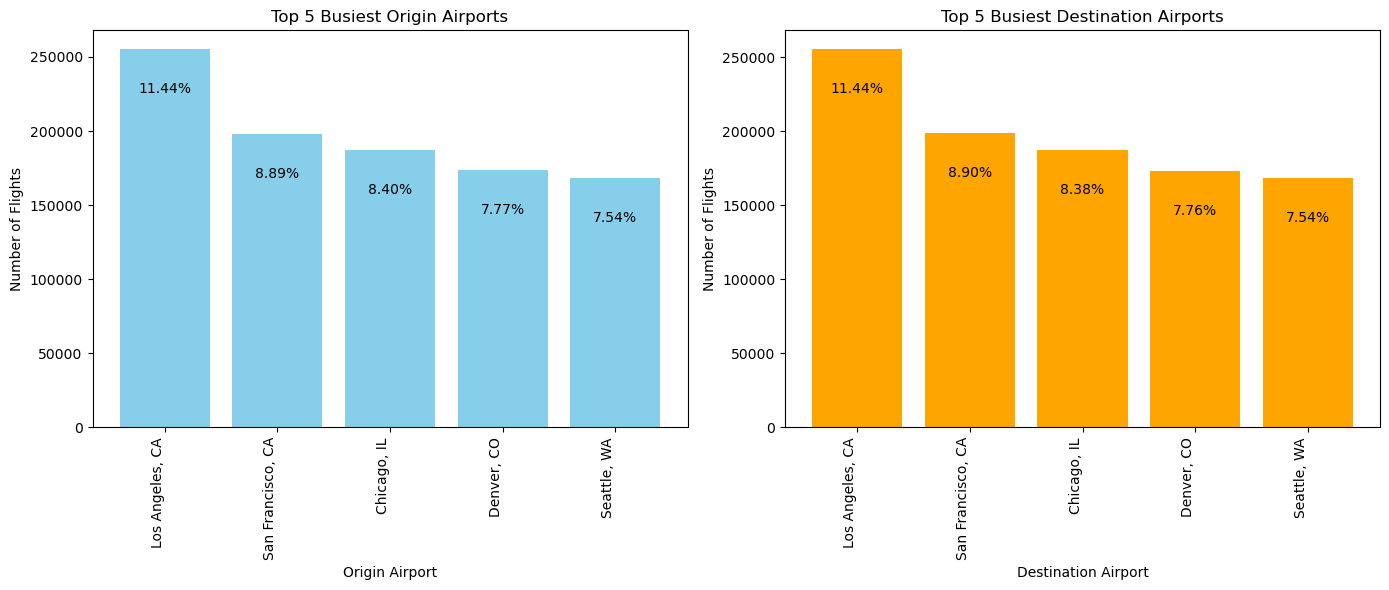

In [84]:
# Group the data by origin airport and count the number of flights
origin_counts = merged_df.groupby('origincityname')['date'].count().reset_index()
origin_counts.columns = ['Airport', 'Total Flights from Origin']

# Group the data by destination airport and count the number of flights
dest_counts = merged_df.groupby('destcityname')['date'].count().reset_index()
dest_counts.columns = ['Airport', 'Total Flights to Destination']

# Sort the airport counts in descending order
origin_counts = origin_counts.sort_values(by='Total Flights from Origin', ascending=False)
dest_counts = dest_counts.sort_values(by='Total Flights to Destination', ascending=False)

# Select the top 5 busiest origin and destination airports
top_5_origin = origin_counts.head(5)
top_5_dest = dest_counts.head(5)

# Calculate total number of flights
total_flights_origin = top_5_origin['Total Flights from Origin'].sum()
total_flights_dest = top_5_dest['Total Flights to Destination'].sum()

# Calculate total number of flights across all origin and destination airports
total_flights_overall = merged_df['date'].count()

# Plot the data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars_origin = plt.bar(top_5_origin['Airport'], top_5_origin['Total Flights from Origin'], color='skyblue')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.title('Top 5 Busiest Origin Airports')
plt.xticks(rotation=90, ha='right')

# Add percentage labels above each bar
for bar in bars_origin:
    percentage = (bar.get_height() / total_flights_overall) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01 * total_flights_overall,
             f"{percentage:.2f}%", ha='center', va='top')

plt.subplot(1, 2, 2)
bars_dest = plt.bar(top_5_dest['Airport'], top_5_dest['Total Flights to Destination'], color='orange')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.title('Top 5 Busiest Destination Airports')
plt.xticks(rotation=90, ha='right')

# Add percentage labels above each bar
for bar in bars_dest:
    percentage = (bar.get_height() / total_flights_overall) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01 * total_flights_overall,
             f"{percentage:.2f}%", ha='center', va='top')

plt.tight_layout()
plt.show()



#### 2. How does the distribution of flight traffic vary among the top 10 busiest airports across different states in the United States?

In [86]:
import plotly.express as px
origin_counts = merged_df.groupby('origincityname')['date'].count().reset_index()
origin_counts.columns = ['Airport', 'Total Flights from Origin']
origin_counts = origin_counts.sort_values(by='Total Flights from Origin', ascending=False)
Top_10=origin_counts.head(10)
Top_10
pd.options.display.float_format = '{:.0f}'.format
Top_10

airport_states = {
    'Los Angeles, CA': 'CA',
    'San Francisco, CA': 'CA',
    'Chicago, IL': 'IL',
    'Denver, CO': 'CO',
    'Seattle, WA': 'WA',
    'Atlanta, GA': 'GA',
    'Washington, DC': 'DC',
    'Las Vegas, NV': 'NV',
    'Dallas/Fort Worth, TX': 'TX',
    'Boston, MA': 'MA'
}

# Add a new column to the DataFrame with the state codes
Top_10['State'] = Top_10['Airport'].map(airport_states)

fig = px.scatter_geo(Top_10, 
                     locations='State',  # Use the State column with state codes
                     locationmode='USA-states', 
                     color='Airport',
                     size='Total Flights from Origin',
                     hover_name='Airport',
                     title='Top 10 Busiest Airports',
                     color_continuous_scale='viridis',
                     size_max=50)

fig.update_geos(scope='usa')
fig.update_layout(height=800, width=1200)
fig.show()

#### 3. What are the most common departure time blocks for flights?

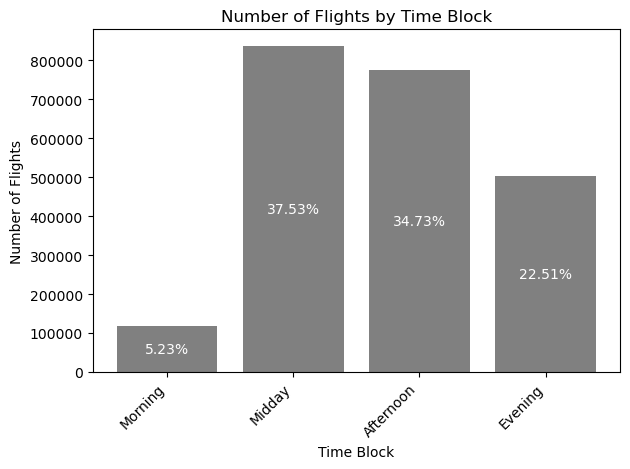

In [88]:
# Define time blocks
time_blocks = {
    'Morning': (0, 600),       
    'Midday': (600, 1200),     
    'Afternoon': (1200, 1800), 
    'Evening': (1800, 2400)    
}

# Convert departure times to integers for easier comparison
merged_df['deptime'] = merged_df['deptime'].astype(int)

# Create a new column to store the time block for each flight
merged_df['Time Block'] = pd.cut(merged_df['deptime'], 
                                 bins=[block[0] for block in time_blocks.values()] + [2400],
                                 labels=list(time_blocks.keys()))

# Count the number of flights in each time block
time_block_counts = merged_df['Time Block'].value_counts()

# Calculate the percentage of flights in each time block
total_flights = time_block_counts.sum()
time_block_percentages = (time_block_counts / total_flights) * 100

# Define the order of time blocks for plotting
time_block_order = ['Morning', 'Midday', 'Afternoon', 'Evening']

# Plot the data
bars = plt.bar(time_block_order, time_block_counts.reindex(time_block_order, fill_value=0), color='grey', label='Number of Flights')

# Add percentage labels inside the bars
for bar, percentage in zip(bars, time_block_percentages.reindex(time_block_order, fill_value=0)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f"{percentage:.2f}%", ha='center', va='center', color='white')

plt.xlabel('Time Block')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Time Block')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 4. Which airlines are experiencing the maximum departure delays?

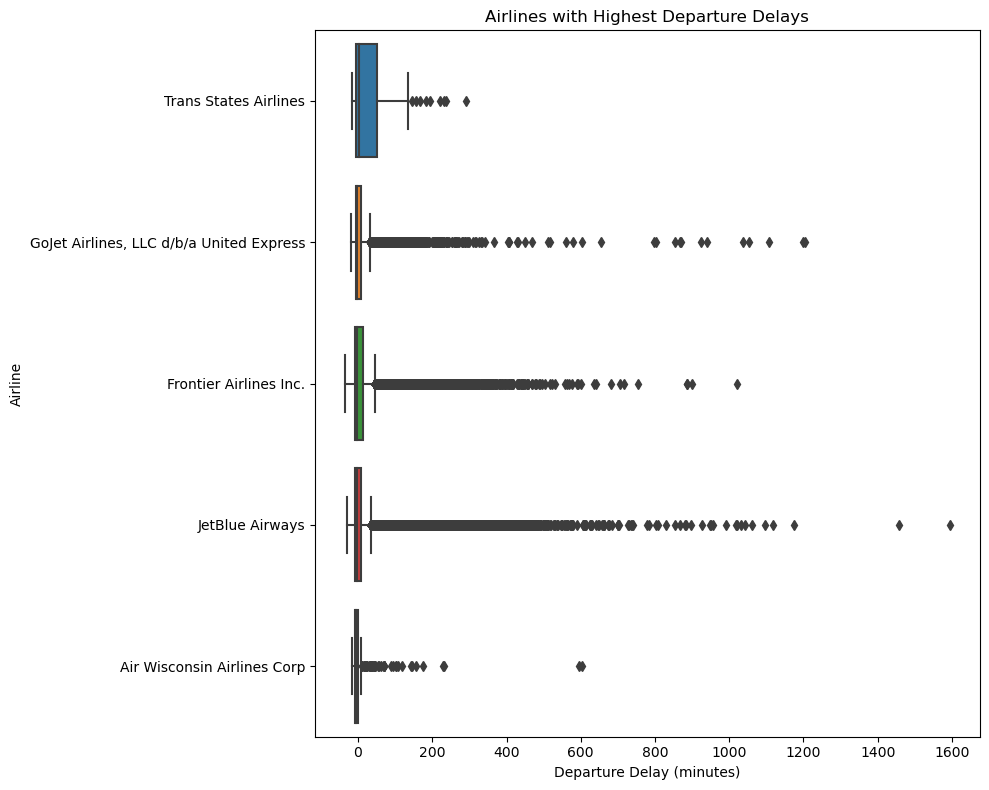

In [89]:
import seaborn as sns
# Get the top 5 airlines with the highest average departure delays
top_5_airlines = merged_df.groupby('airline')['depdelayminutes'].mean().nlargest(5).index

# Filter the data for flights operated by the top 5 airlines
merged_top_5_airlines = merged_df[merged_df['airline'].isin(top_5_airlines)]

# Create horizontal box plots for departure delay by the top 5 airlines
plt.figure(figsize=(10, 8))
sns.boxplot(y='airline', x='depdelay', data=merged_top_5_airlines, order=top_5_airlines)
plt.title('Airlines with Highest Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Airline') # Adjust the x-axis limits as needed
plt.tight_layout()
plt.show()


#### 5. What are the top 5 most common flight routes, and how do they compare in terms of frequency of occurrence?

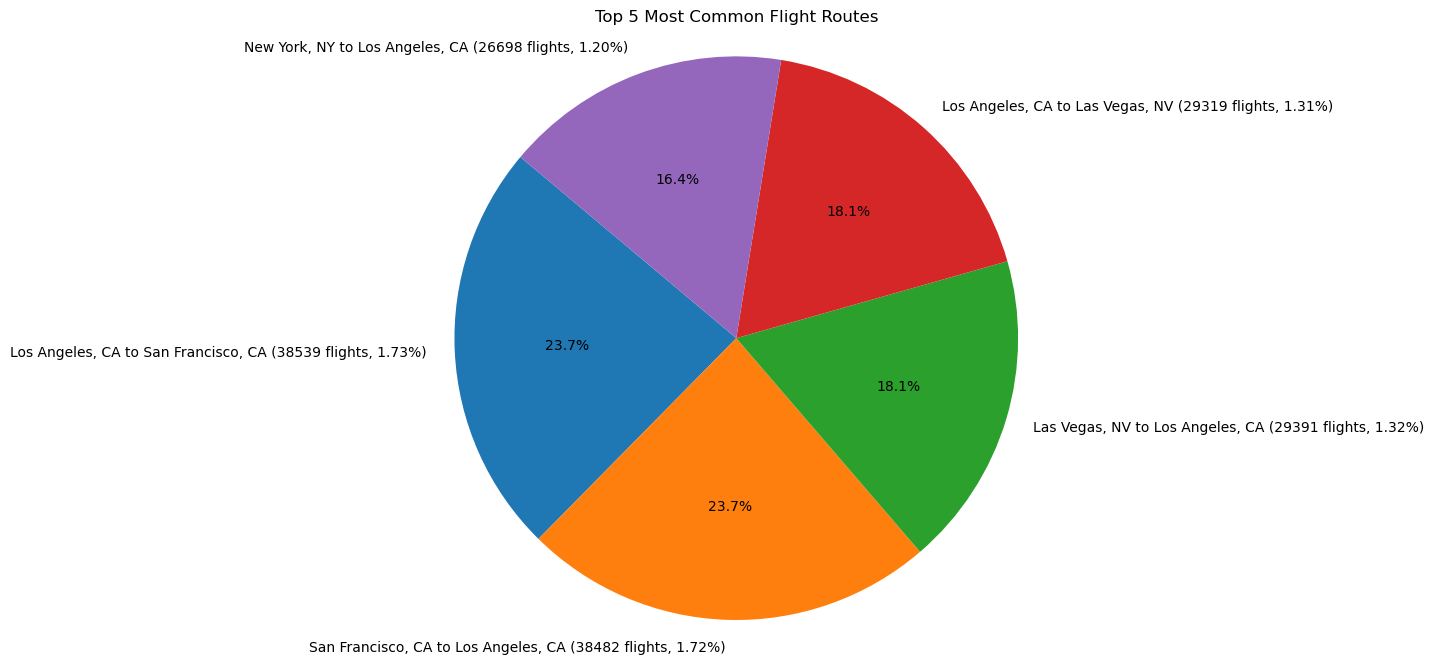

In [90]:
# Group the data by destination city and arrival city, then count the number of flights for each route
route_counts = merged_df.groupby(['destcityname', 'origincityname']).size().reset_index(name='Flight Count')

# Sort the routes by the number of flights in descending order
route_counts = route_counts.sort_values(by='Flight Count', ascending=False)

# Select the top 5 most common flight routes
top_5_routes = route_counts.head(5)

# Calculate the total number of flights across all routes
total_flights = route_counts['Flight Count'].sum()

# Plot the data as a pie chart
plt.figure(figsize=(8, 8))
labels = [f"{route} ({count} flights, {count/total_flights*100:.2f}%)" for route, count in zip(top_5_routes['destcityname'] + ' to ' + top_5_routes['origincityname'], top_5_routes['Flight Count'])]
plt.pie(top_5_routes['Flight Count'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Common Flight Routes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### 6. How do departure delay patterns vary across the top 5 airlines?

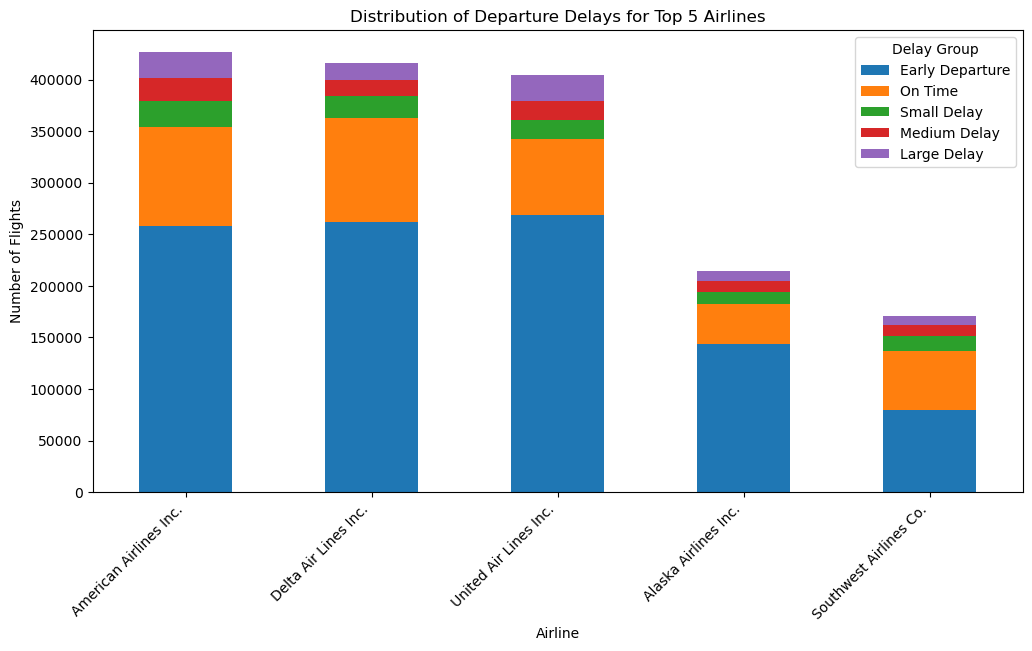

In [91]:
# Define delay thresholds (in minutes)
ontime_threshold = 0  
small_delay_threshold = 15  
medium_delay_threshold = 30 
large_delay_threshold = 60  

# Categorize departure delays into delay groups
def categorize_delay(departure_delay):
    if departure_delay < ontime_threshold:
        return 'Early Departure'
    elif ontime_threshold <= departure_delay <= small_delay_threshold:
        return 'On Time'
    elif small_delay_threshold < departure_delay <= medium_delay_threshold:
        return 'Small Delay'
    elif medium_delay_threshold < departure_delay <= large_delay_threshold:
        return 'Medium Delay'
    else:
        return 'Large Delay'

# Apply delay categorization to the data
merged_df['Delay Group'] = merged_df['depdelay'].apply(categorize_delay)

# Filter data for the top 5 airlines based on the number of flights
top_5_airlines = merged_df['airline'].value_counts().head(5).index
filtered_data = merged_df[merged_df['airline'].isin(top_5_airlines)]

# Group data by delay group and airline, and count the number of flights
delay_group_counts = filtered_data.groupby(['airline', 'Delay Group']).size().unstack(fill_value=0)

delay_group_counts = delay_group_counts.reindex(top_5_airlines)

delay_group_order = ['Early Departure', 'On Time', 'Small Delay', 'Medium Delay', 'Large Delay']

# Plot the stacked bar chart with the specified order
delay_group_counts.loc[:, delay_group_order].plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribution of Departure Delays for Top 5 Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Group')
plt.show()


#### 7. Are there any particular months that experience significantly higher or lower flight activity?

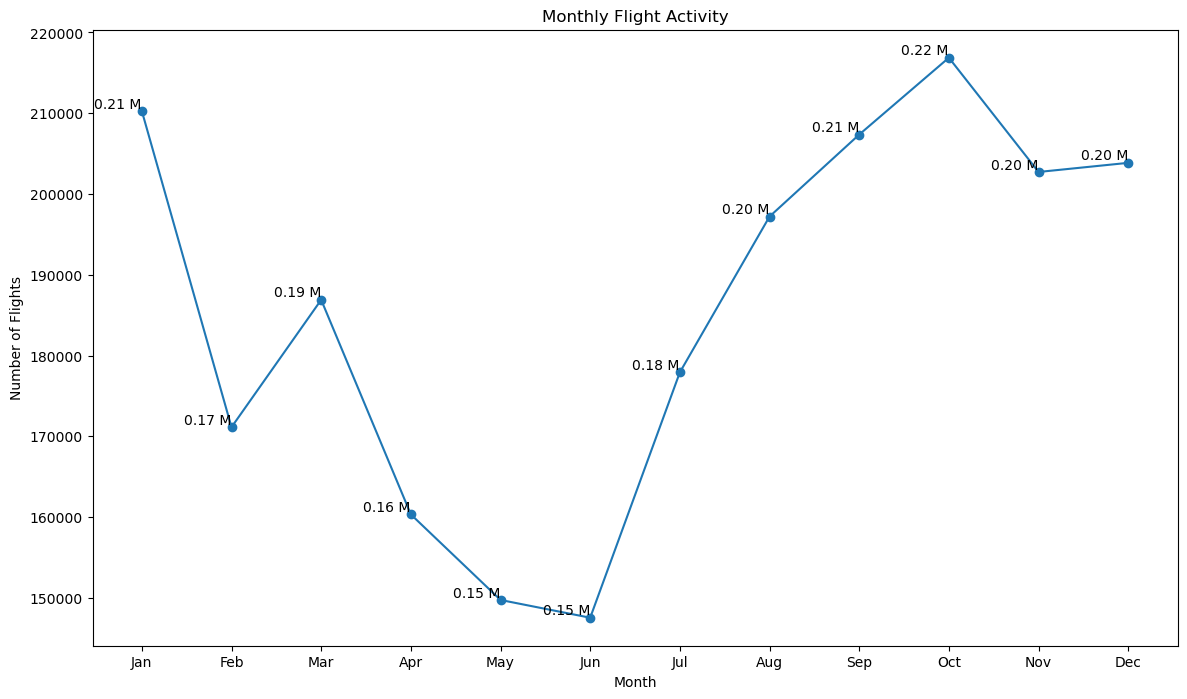

In [92]:
# Group data by month and count the number of flights
monthly_flight_counts = merged_df.groupby('month').size()

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(monthly_flight_counts, marker='o', linestyle='-')
plt.title('Monthly Flight Activity')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add annotations for each data point
for month, count in enumerate(monthly_flight_counts, start=1):
    plt.text(month, count, f'{count/1e6:.2f} M', ha='right', va='bottom', fontsize=10)

plt.show()


#### 8. How does the on-time performance of the top 10 airlines compare in terms of both departure and arrival punctuality?

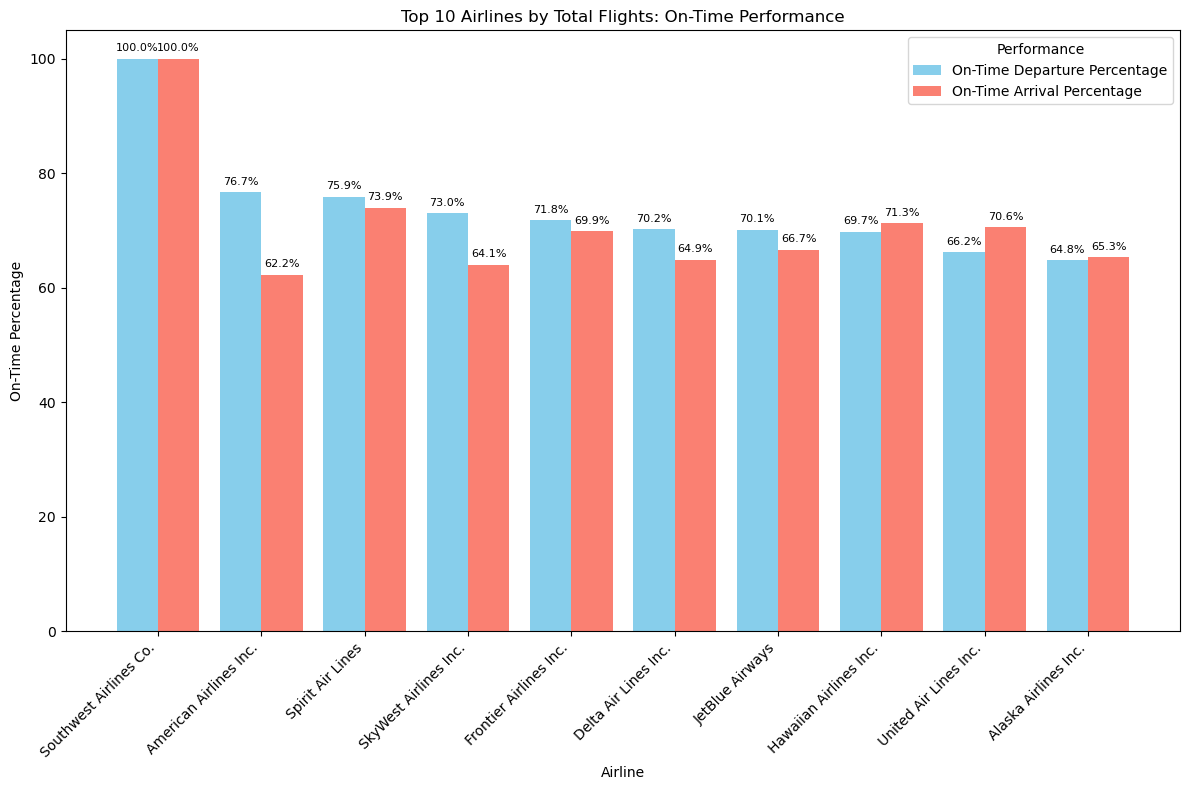

In [96]:
# Calculate total number of flights for each airline
total_flights = merged_df['airline'].value_counts()

# Calculate number of on-time departures for each airline
ontime_departures = merged_df[merged_df['depdelay'] <= 0].groupby('airline').size()

# Calculate number of on-time arrivals for each airline
ontime_arrivals = merged_df[merged_df['arrdelay'] <= 0].groupby('airline').size()

# Calculate percentage of on-time departures for each airline
on_time_departure_percentage = (ontime_departures / total_flights) * 100

# Calculate percentage of on-time arrivals for each airline
on_time_arrival_percentage = (ontime_arrivals / total_flights) * 100

# Create a DataFrame to store the results
on_time_performance = pd.DataFrame({
    'Airline': total_flights.index,
    'On-Time Departure Percentage': on_time_departure_percentage,
    'On-Time Arrival Percentage': on_time_arrival_percentage
})

# Sort the DataFrame based on on-time departure percentage
on_time_performance_sorted = on_time_performance.sort_values(by='On-Time Departure Percentage', ascending=False)

# Consider only the top 10 airlines based on total flights
top_10_airlines_total_flights = total_flights.head(10).index

# Filter the on-time performance data for the top 10 airlines
top_10_airlines_performance = on_time_performance[on_time_performance['Airline'].isin(top_10_airlines_total_flights)]

# Sort the filtered DataFrame based on on-time departure percentage
top_10_airlines_performance_sorted = top_10_airlines_performance.sort_values(by='On-Time Departure Percentage', ascending=False)

# Set the width of the bars
bar_width = 0.4

# Set the x-coordinate for the first group of bars
index = np.arange(len(top_10_airlines_performance_sorted))

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the first set of bars for on-time departure percentage
plt.bar(index - bar_width/2, top_10_airlines_performance_sorted['On-Time Departure Percentage'], bar_width, color='skyblue', label='On-Time Departure Percentage')

# Create the second set of bars for on-time arrival percentage
plt.bar(index + bar_width/2, top_10_airlines_performance_sorted['On-Time Arrival Percentage'], bar_width, color='salmon', label='On-Time Arrival Percentage')

# Annotate each bar with its corresponding percentage value
for i in range(len(top_10_airlines_performance_sorted)):
    plt.text(i - bar_width/2, top_10_airlines_performance_sorted['On-Time Departure Percentage'].iloc[i] + 1,
             f"{top_10_airlines_performance_sorted['On-Time Departure Percentage'].iloc[i]:.1f}%", ha='center', va='bottom',fontsize=8)
    plt.text(i + bar_width/2, top_10_airlines_performance_sorted['On-Time Arrival Percentage'].iloc[i] + 1,
             f"{top_10_airlines_performance_sorted['On-Time Arrival Percentage'].iloc[i]:.1f}%", ha='center', va='bottom', fontsize=8)

# Set labels and title
plt.xlabel('Airline')
plt.ylabel('On-Time Percentage')
plt.title('Top 10 Airlines by Total Flights: On-Time Performance')
plt.xticks(index, top_10_airlines_performance_sorted['Airline'], rotation=45, ha='right')

# Show the legend
plt.legend(title='Performance')
plt.tight_layout()
plt.show()


#### 9. Which season experiences the highest average arrival and departure  delay?

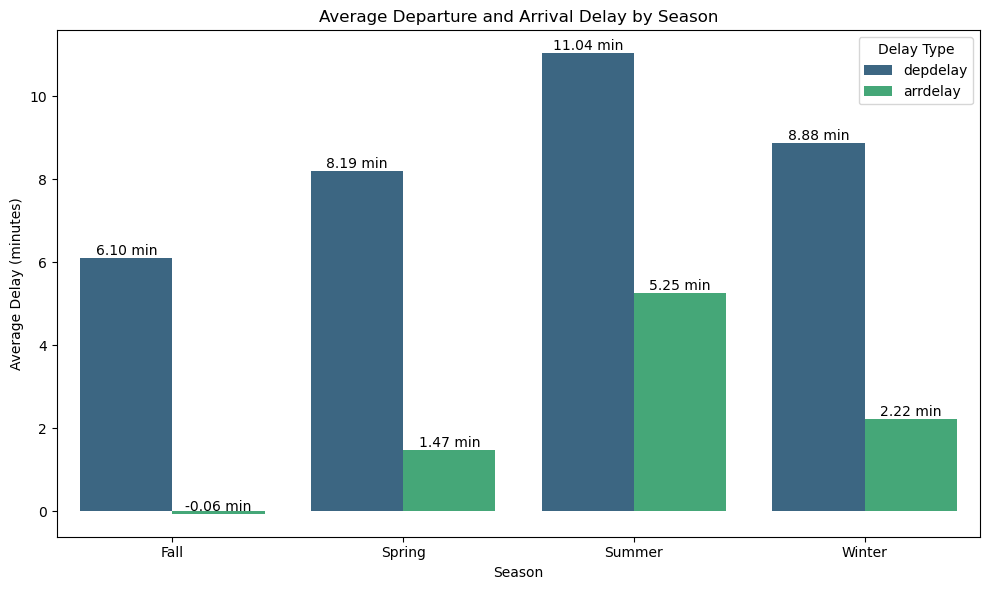

In [97]:
# Define the season map
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
              6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 
              11: 'Fall', 12: 'Winter'}

# Add a new column 'Season' to the DataFrame
merged_df['Season'] = merged_df['month'].map(season_map)

# Group data by season and calculate the average departure and arrival delays for each season
season_delay = merged_df.groupby('Season')[['depdelay', 'arrdelay']].mean().reset_index()

# Melt the DataFrame to long format for easy plotting
melted_df = season_delay.melt(id_vars='Season', var_name='Delay Type', value_name='Average Delay')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a grouped bar plot
ax = sns.barplot(x='Season', y='Average Delay', hue='Delay Type', data=melted_df, palette='viridis')

# Annotate each bar with its corresponding average delay value
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f} min", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Departure and Arrival Delay by Season')

# Show the plot
plt.tight_layout()
plt.show()

#### 10. How does the average delay in departure and arrival times vary across different time blocks?

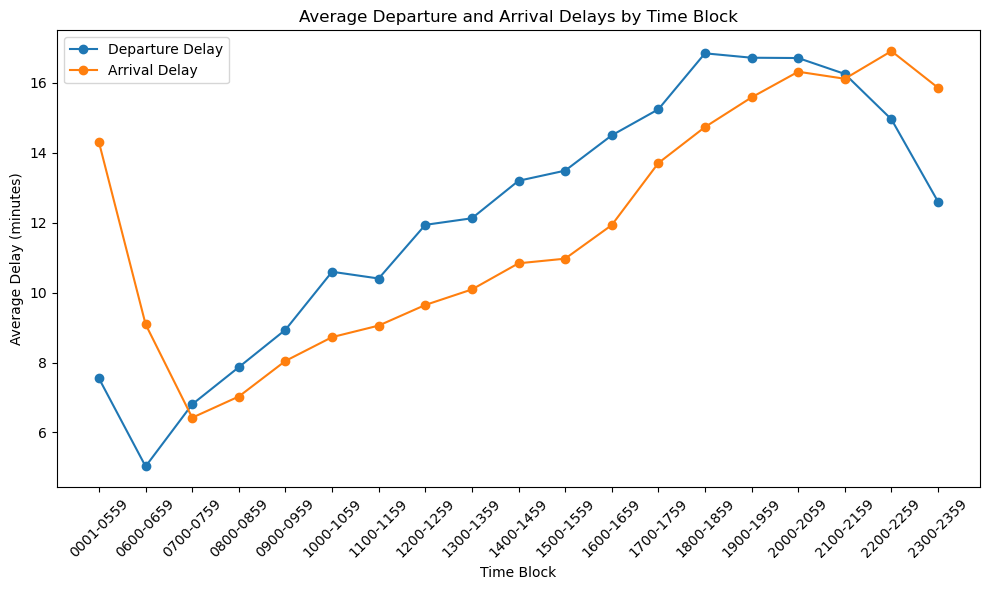

In [98]:
avg_dep_delay_by_time_block = merged_df.groupby('deptimeblk')['depdelayminutes'].mean().reset_index()

# Calculate average arrival delays by arrival time block
avg_arr_delay_by_time_block = merged_df.groupby('arrtimeblk')['arrdelayminutes'].mean().reset_index()

# Merge the two DataFrames on time block
merged_delay_df = pd.merge(avg_dep_delay_by_time_block, avg_arr_delay_by_time_block, 
                           left_on='deptimeblk', right_on='arrtimeblk', suffixes=('_dep', '_arr'))

# Plot the relationship between departure and arrival time blocks and their average delays
plt.figure(figsize=(10, 6))
plt.plot(merged_delay_df['deptimeblk'], merged_delay_df['depdelayminutes'], label='Departure Delay', marker='o')
plt.plot(merged_delay_df['arrtimeblk'], merged_delay_df['arrdelayminutes'], label='Arrival Delay', marker='o')
plt.xlabel('Time Block')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Departure and Arrival Delays by Time Block')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()